In [1]:
%matplotlib notebook
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
print(matplotlib.__version__)

2.2.2


In [6]:
vj = np.array([-5,-5,0]) # Sensor j
vk = np.array([-1,5,3]) # Sensor k
Tjk = np.random.uniform(-3,3,(3,10)) # true target
pj = (np.zeros(3) - vj).astype(float)
pj /= np.linalg.norm(pj)
pk = (np.zeros(3) - vk).astype(float)
pk /= np.linalg.norm(pk)

In [9]:
n = np.linspace(0,15,100)
pj_line = vj + np.outer(n,pj)
pk_line = vk + np.outer(n,pk)

<IPython.core.display.Javascript object>


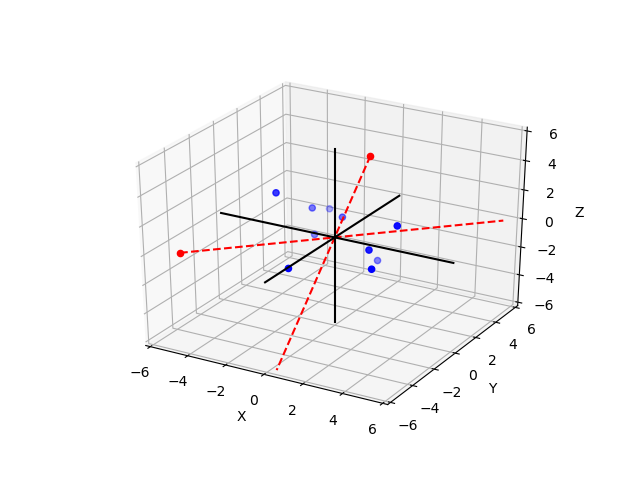

Text(0.5,0,'Z')

In [15]:
# Plot this s!@# in 3D which, like, how?
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(Tjk[0],Tjk[1],Tjk[2],color='b')
ax.scatter(vj[0],vj[1],vj[2],color='r')
ax.plot(pj_line[:,0],pj_line[:,1],pj_line[:,2],'--r')
ax.scatter(vk[0],vk[1],vk[2],color='r')
ax.plot(pk_line[:,0],pk_line[:,1],pk_line[:,2],'--r')
ax.plot([0,0],[0,0],[-6,6],color='black')
ax.plot([-6,6],[0,0],[0,0],color='black')
ax.plot([0,0],[-6,6],[0,0],color='black')
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
ax.set_zlim(-6,6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [16]:
def compute_view_matrix(position, target, up):
    '''
    Inputs: 
        position : 3D coordinates of the camera center in world coordinates
        target : 3D coordinates of the camera target in world coordinates
        up : vector specifying the up direction of the camera. should be orthogonal to (target-position)
    Outputs:
        P : 3 x 4 camera extrinsic matrix, a concatenation of rotation matrix and translation matrix
    '''
    L = target - position
    L = L / np.linalg.norm(L)
    s = np.cross(L, up)
    s = s / np.linalg.norm(s)
    u_prime = np.cross(s,L)
    R = np.r_[s,u_prime,-L].reshape((3,3))
    T = -R @ position
    P = np.c_[R,T]
    return P

In [17]:
def project(position,target,up,X):
    '''
    Given camera extrinsic details, and 3D points X, 
    return the homogenous coordinates of Y,
    which are projected into the camera plane.
    See compute_view_matrix() details
    '''
    P = compute_view_matrix(position,target,up)
    if len(X.shape) > 1:
        _,n = X.shape
        Y = P @ np.r_[X,np.ones((1,n))]
        Y /= Y[2,:]
        return Y
    else:
        Y = P @ np.r_[X,1]
        Y /= Y[2]
        return Y

<IPython.core.display.Javascript object>


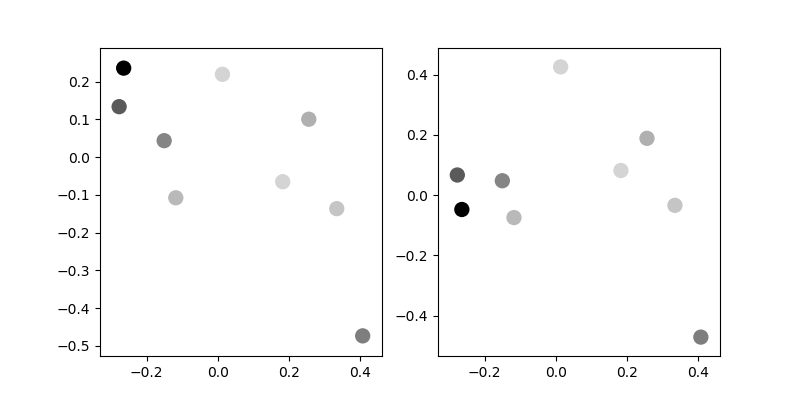

In [21]:
Y1 = project(vj,np.zeros(3),np.array([0,0,1]),Tjk)
Y2 = project(vk,np.zeros(3),np.array([0,-3,5]),Tjk)

plt.gray()
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(121)
ax.scatter(Y1[0,:],Y1[1,:],c=Tjk[1,:],s=100)
ax = fig.add_subplot(122)
ax.scatter(Y1[0,:],Y2[1,:],c=Tjk[1,:],s=100)
plt.show()

<IPython.core.display.Javascript object>


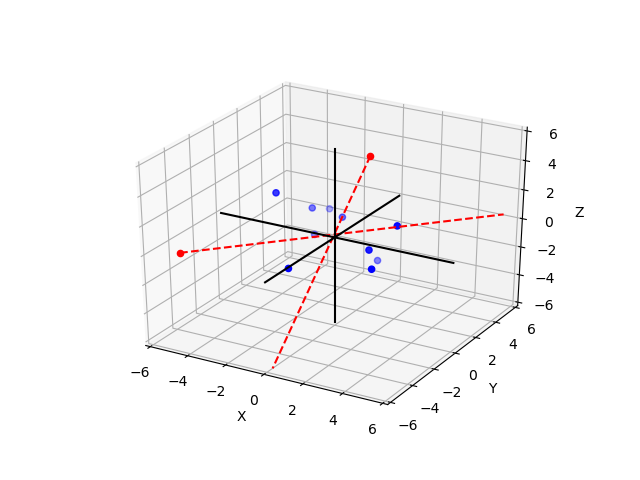

Text(0.5,0,'Z')

In [23]:
vj = np.array([-5,-5,0]) # Sensor j
vk = np.array([-1,5,3]) # Sensor k
pj = (np.random.normal(0,.1,3) - vj).astype(float)
pj /= np.linalg.norm(pj)
pk = (np.random.normal(0,.1,3) - vk).astype(float)
pk /= np.linalg.norm(pk)
n = np.linspace(0,15,100)
pj_line = vj + np.outer(n,pj)
pk_line = vk + np.outer(n,pk)
# Plot this s!@# in 3D which, like, how?
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(Tjk[0],Tjk[1],Tjk[2],color='b')
ax.scatter(vj[0],vj[1],vj[2],color='r')
ax.plot(pj_line[:,0],pj_line[:,1],pj_line[:,2],'--r')
ax.scatter(vk[0],vk[1],vk[2],color='r')
ax.plot(pk_line[:,0],pk_line[:,1],pk_line[:,2],'--r')
ax.plot([0,0],[0,0],[-6,6],color='black')
ax.plot([-6,6],[0,0],[0,0],color='black')
ax.plot([0,0],[-6,6],[0,0],color='black')
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
ax.set_zlim(-6,6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

<IPython.core.display.Javascript object>


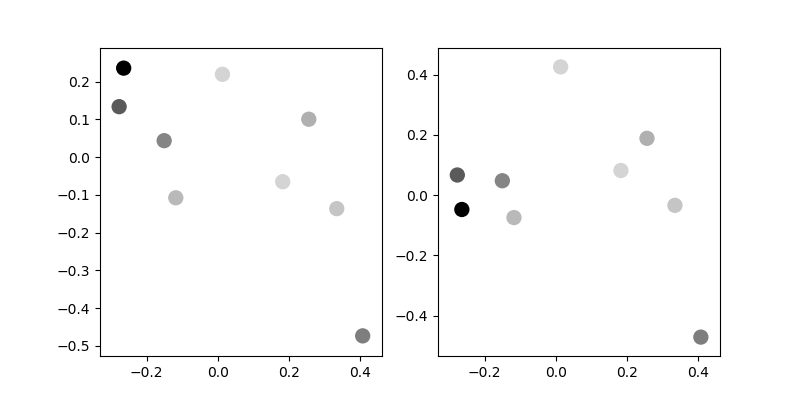

In [27]:
plt.gray()
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(121)
ax.scatter(Y1[0,:],Y1[1,:],c=Tjk[1,:],s=100)
ax = fig.add_subplot(122)
ax.scatter(Y1[0,:],Y2[1,:],c=Tjk[1,:],s=100)
plt.show()

[0.12262874 0.00603811 0.07569734]


<IPython.core.display.Javascript object>


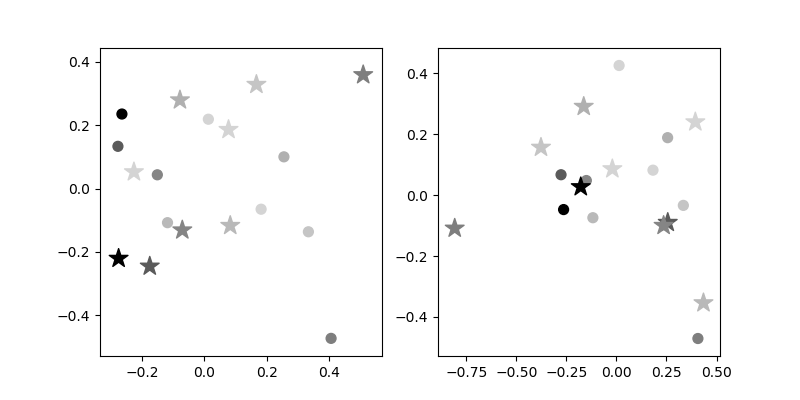

In [42]:
tgt1 = np.random.normal(0,.1,3)
tgt2 = np.random.normal(0,.1,3)
Y1_noisy = project(vj,tgt1,np.array([0,-tgt1[2],tgt1[1]]),Tjk)
Y2_noisy = project(vk,tgt2,np.array([0,-tgt2[2],tgt2[1]]),Tjk)

print(tgt1)
plt.gray()
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(121)
ax.scatter(Y1[0,:],Y1[1,:],c=Tjk[1,:],s=50)
ax.scatter(Y1_noisy[0,:],Y1_noisy[1,:],c=Tjk[1,:],s=200,marker='*')
ax = fig.add_subplot(122)
ax.scatter(Y1[0,:],Y2[1,:],c=Tjk[1,:],s=50)
ax.scatter(Y2_noisy[0,:],Y2_noisy[1,:],c=Tjk[1,:],s=200,marker='*')
plt.show()